In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [19]:
df = pd.read_csv('C:\\Users\\aahsa\\Downloads\\Recipes_Features.csv')

In [20]:
df.head()

,RecipeId,Name,AuthorId,CookTime,PrepTime,TotalTime,Description,Images,RecipeCategory,Keywords,...,ProteinContent,RecipeServings,RecipeYield,AuthorName,NormalizedRating,dairy-free,gluten-free,low-carb,vegan,vegetarian
0,38,Low-Fat Berry Blue Frozen Dessert,1533,86400.0,2700,89100,Make and share this Low-Fat Berry Blue Frozen ...,"c(""https://img.sndimg.com/food/image/upload/w_...",Frozen Desserts,"c(""Dessert"", ""Low Protein"", ""Low Cholesterol"",...",...,3.2,4.0,1.0,Dancer,0.875,0,0,0,0,0
1,42,Cabbage Soup,1538,1800.0,1200,3000,Make and share this Cabbage Soup recipe from F...,"""https://img.sndimg.com/food/image/upload/w_55...",Vegetable,"c(""Low Protein"", ""Vegan"", ""Low Cholesterol"", ""...",...,4.3,4.0,1.0,Duckie067,0.875,0,0,0,0,0
2,45,Buttermilk Pie With Gingersnap Crumb Crust,1580,3000.0,1800,4800,Make and share this Buttermilk Pie With Ginger...,"""https://img.sndimg.com/food/image/upload/w_55...",Pie,"c(""Dessert"", ""Healthy"", ""Weeknight"", ""Oven"", ""...",...,4.2,8.0,1.0,tristitia,0.750,0,0,0,0,0
3,46,A Jad - Cucumber Pickle,1533,1.0,1500,1500,Make and share this A Jad - Cucumber Pickle re...,character(0),Vegetable,"c(""Thai"", ""Asian"", ""Free Of..."", ""< 30 Mins"")",...,0.1,1.0,1 cup,Dancer,1.000,0,0,0,0,0
4,47,Butter Pecan Cookies,1573,540.0,3300,3840,Make and share this Butter Pecan Cookies recip...,"c(""https://img.sndimg.com/food/image/upload/w_...",Dessert,"c(""Cookie & Brownie"", ""Fruit"", ""Nuts"", ""Weekni...",...,0.8,1.0,84 cookies,benluc,0.750,0,0,0,0,0


In [31]:
df['PrepTimeCategory'] = df['CookTime'].apply(lambda x: 'Quick' if x < 60 else ('Moderate' if 60 <= x <= 120 else 'Long'))

In [22]:
df = pd.get_dummies(df, columns=['PrepTimeCategory'], prefix='PrepTime')
# Ensure all dummy columns exist
for col in ['PrepTime_Quick', 'PrepTime_Moderate', 'PrepTime_Long']:
    if col not in df.columns:
        df[col] = 0

In [23]:
df['PrepTime_Quick'] = df['PrepTime_Quick'].astype(int)
df['PrepTime_Moderate'] = df['PrepTime_Moderate'].astype(int)
df['PrepTime_Long'] = df['PrepTime_Long'].astype(int)
print(df[['TotalTime', 'PrepTime_Quick', 'PrepTime_Moderate', 'PrepTime_Long']].head())


   TotalTime  PrepTime_Quick  PrepTime_Moderate  PrepTime_Long
0      89100               0                  0              1
1       3000               0                  0              1
2       4800               0                  0              1
3       1500               1                  0              0
4       3840               0                  0              1


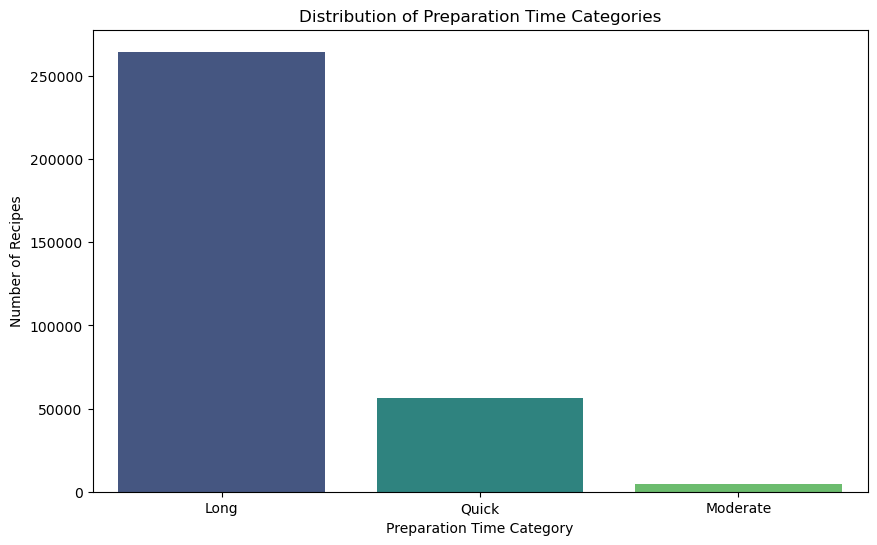

In [33]:
# Plot the Bar Plot
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='PrepTimeCategory', palette='viridis')
plt.title('Distribution of Preparation Time Categories')
plt.xlabel('Preparation Time Category')
plt.ylabel('Number of Recipes')
plt.show()

In [39]:
df['PrepTimeCategory'] = df['CookTime'].apply(lambda x: 'Quick' if x < 30 else ('Moderate' if 30 <= x <= 60 else ('Long' if x > 120 else 'Moderate')))
df = pd.get_dummies(df, columns=['PrepTimeCategory'], prefix='PrepTime')
df['PrepTime_Quick'] = df['PrepTime_Quick'].astype(int)
df['PrepTime_Moderate'] = df['PrepTime_Moderate'].astype(int)
df['PrepTime_Long'] = df['PrepTime_Long'].astype(int)

In [43]:
def categorize_cuisine(Keywords, RecipeCategory):
    if 'Italian' in Keywords or 'Italian' in RecipeCategory:
        return 'Italian'
    elif 'Mexican' in Keywords or 'Mexican' in RecipeCategory:
        return 'Mexican'
    elif 'Chinese' in Keywords or 'Chinese' in RecipeCategory:
        return 'Chinese'
    elif 'Indian' in Keywords or 'Indian' in RecipeCategory:
        return 'Indian'
    elif 'Japanese' in Keywords or 'Japanese' in RecipeCategory:
        return 'Japanese'
    elif 'Thai' in Keywords or 'Thai' in RecipeCategory:
        return 'Thai'
    elif 'Asian' in Keywords or 'Asian' in RecipeCategory:
        return 'Asian'
    elif 'Persian' in Keywords or 'Persian' in RecipeCategory:
        return 'Persian'
    elif 'American' in Keywords or 'American' in RecipeCategory:
        return 'American'
    elif 'middle East' in Keywords or 'middle East' in RecipeCategory:
        return 'Middle East'
    else:
        return 'Other'


In [45]:
df['CuisineType'] = df.apply(lambda row: categorize_cuisine(row['Keywords'], row['RecipeCategory']), axis=1)
print(df[['Keywords', 'RecipeCategory', 'CuisineType']].head(5))

                                            Keywords   RecipeCategory  \
0  c("Dessert", "Low Protein", "Low Cholesterol",...  Frozen Desserts   
1  c("Low Protein", "Vegan", "Low Cholesterol", "...        Vegetable   
2  c("Dessert", "Healthy", "Weeknight", "Oven", "...              Pie   
3      c("Thai", "Asian", "Free Of...", "< 30 Mins")        Vegetable   
4  c("Cookie & Brownie", "Fruit", "Nuts", "Weekni...          Dessert   

  CuisineType  
0       Other  
1       Other  
2       Other  
3        Thai  
4       Other  


In [69]:
#Testing the feature:
indian_recipes = df[df['CuisineType'] == 'Indian']
print(indian_recipes)

        RecipeId                                Name    AuthorId  CookTime  \
58           159                       Chicken Curry      148316    2520.0   
94           236                    Chicken Curry II        1597       1.0   
321          675                  Curried Chicken II        1543       1.0   
605         2490                      Cucumber Raita        1533       1.0   
684         2673           West Indian Bread Pudding        1549       1.0   
...          ...                                 ...         ...       ...   
324980    540873  Charishma's Gur Ki Roti With Khoya        6357    2100.0   
325020    540939                   Chettinad Chicken       78626    1800.0   
325047    540977      INDIAN BASMATI With DRY FRUITS  2001004241    1800.0   
325143    541143          Instant Rava Dhokla Recipe  2002835253     120.0   
325260    541356       Masala Maggi Noodles in a Mug  2002835253     240.0   

        PrepTime  TotalTime  \
58          3900       6420   
9

In [47]:
# Assuming your DataFrame is named df and the target variable is 'target'
X = df[['CuisineType']]
y = df['AggregatedRating']  # Replace 'target' with your actual target variable

# Convert categorical feature 'CuisineType' to numerical using one-hot encoding
X = pd.get_dummies(X, columns=['CuisineType'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [48]:
# Initialize the Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_regressor.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [49]:
#random_state=42, you ensure that the results are reproducible.

In [50]:
# Make predictions on the test set
y_pred = rf_regressor.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')


Mean Squared Error: 3.5008010295855896


In [51]:
bins = [0, 10, 50, 100, 500, float('inf')]
labels = ['Very Low', 'Low', 'Medium', 'High', 'Very High']

df['ReviewCountBins'] = pd.cut(df['ReviewCount'], bins=bins, labels=labels, right=False)

In [52]:
# Assuming your DataFrame is named df and the target variable is 'target'
X = df[['ReviewCountBins']]
y = df['AggregatedRating']  # Replace 'target' with your actual target variable

# Convert categorical feature 'ReviewCountBins' to numerical using one-hot encoding
X = pd.get_dummies(X, columns=['ReviewCountBins'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [53]:
# Initialize the Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_regressor.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [54]:
# Make predictions on the test set
y_pred = rf_regressor.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')


Mean Squared Error: 3.2756024254314373


In [57]:
from sklearn.feature_extraction.text import CountVectorizer
# Combine all descriptions into a single string
all_descriptions = ' '.join(df['RecipeIngredientParts'].dropna().astype(str))

# Initialize CountVectorizer to count word frequencies
vectorizer = CountVectorizer(stop_words='english')
word_counts = vectorizer.fit_transform([all_descriptions])

# Convert the word counts to a DataFrame
word_counts_df = pd.DataFrame(word_counts.toarray(), columns=vectorizer.get_feature_names_out())

In [58]:
# Sum the word counts for each ingredient
ingredient_counts = word_counts_df.sum().sort_values(ascending=False)

# Display the top 20 popular ingredients
top_ingredients = ingredient_counts.head(20)
print(top_ingredients)

salt       141655
sugar      130468
pepper     116070
butter     101310
cheese      99787
fresh       96880
flour       86797
garlic      86608
onion       81895
ground      76273
oil         68766
powder      66725
water       64474
olive       59895
milk        55299
baking      50824
cream       50459
green       44638
chicken     44235
sauce       44162
dtype: int64


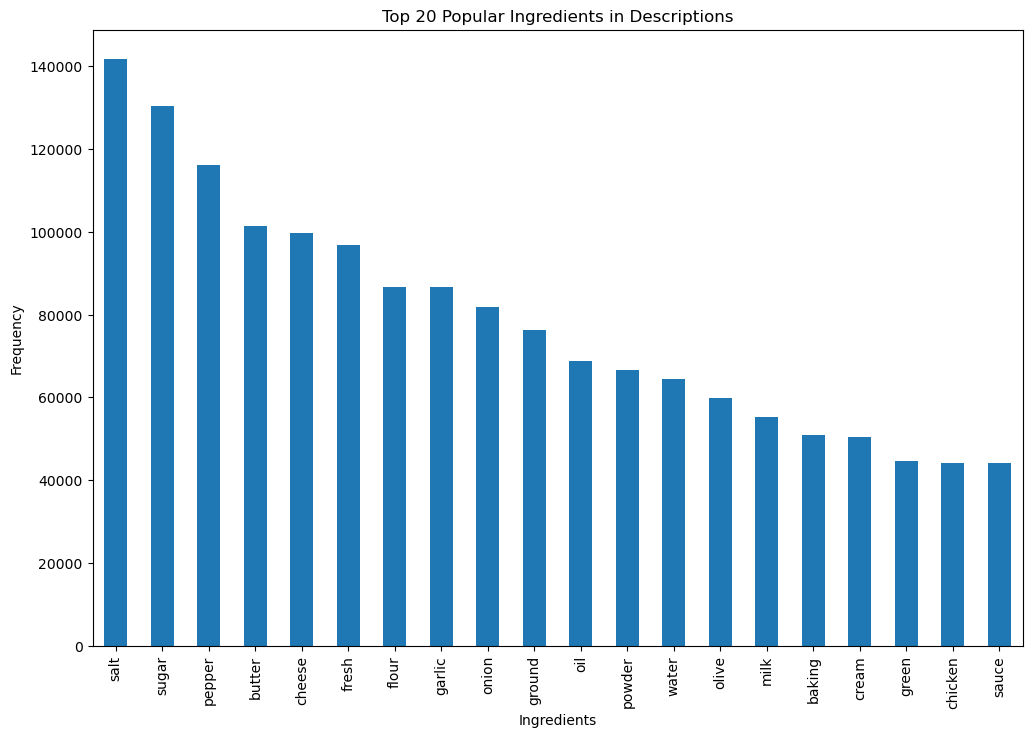

In [59]:
# Plot the top 20 popular ingredients
plt.figure(figsize=(12, 8))
top_ingredients.plot(kind='bar')
plt.title('Top 20 Popular Ingredients in Descriptions')
plt.xlabel('Ingredients')
plt.ylabel('Frequency')
plt.show()

In [60]:
# Create a function to check for the presence of top ingredients
def check_ingredient_presence(ingredients, top_ingredients):
    return [1 if ingredient in ingredients else 0 for ingredient in top_ingredients]

# Apply the function to create features for each top ingredient
for ingredient in top_ingredients.index:
    df[ingredient] = df['RecipeIngredientParts'].apply(lambda x: 1 if ingredient in x else 0)

In [61]:
from sklearn.model_selection import train_test_split 
from sklearn.ensemble import RandomForestRegressor 
from sklearn.metrics import mean_squared_error
# Assuming your target variable is 'AggregatedRating'
X = df[top_ingredients.index]
y = df['AggregatedRating']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [62]:
# Initialize the Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_regressor.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [63]:
# Make predictions on the test set
y_pred = rf_regressor.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 3.709603429108173


In [71]:
# Define a function to categorize meats, seafood, and vegetarian items
def categorize_meal(row):
    meat_keywords = ['meat', 'chicken', 'beef', 'pork', 'lamb', 'turkey','duck','goat','rabbit','sausage','mutton','veal','liver','brain']
    seafood_keywords = ['seafood','fish', 'shrimp', 'crab', 'lobster', 'salmon','cod','crayfish','mussles','scallops','Anchovies','Oyester','squid', 'octopus','prawns']

    if any(keyword in row['Keywords'] for keyword in meat_keywords) or \
       any(keyword in row['RecipeIngredientParts'] for keyword in meat_keywords) or \
       any(keyword in row['Description'] for keyword in meat_keywords):
        return 'Meat'
    elif any(keyword in row['Keywords'] for keyword in seafood_keywords) or \
         any(keyword in row['RecipeIngredientParts'] for keyword in seafood_keywords) or \
         any(keyword in row['Description'] for keyword in seafood_keywords):
        return 'Seafood'
    else:
        return 'Vegetarian'

# Apply the function to create a new column 'MealType'
df['MealType'] = df.apply(categorize_meal, axis=1)

In [77]:
print(df[['Name','MealType']].head(-10))

                                              Name    MealType
0                Low-Fat Berry Blue Frozen Dessert  Vegetarian
1                                     Cabbage Soup  Vegetarian
2       Buttermilk Pie With Gingersnap Crumb Crust  Vegetarian
3                          A Jad - Cucumber Pickle  Vegetarian
4                             Butter Pecan Cookies  Vegetarian
...                                            ...         ...
325259    Chicken Pot Pie with Mashed Potato Crust        Meat
325260               Masala Maggi Noodles in a Mug  Vegetarian
325261                     Chocolate Rum Snowballs  Vegetarian
325262             Cookie Cutter Shortbread Hearts  Vegetarian
325263                11-Minute Microwave Caramels  Vegetarian

[325264 rows x 2 columns]


In [79]:
# Define a function to categorize recipes as easy or difficult
def categorize_difficulty(row):
    if row['TotalTime'] <= 1800:  # 30 minutes or less
        return 'Easy'
    elif row['TotalTime'] <= 7200:  # Between 30 minutes and 2 hours
        return 'Medium'
    else:
        return 'Difficult'

# Apply the function to create a new column 'Difficulty'
df['Difficulty'] = df.apply(categorize_difficulty, axis=1)

# Display the first few rows of the DataFrame to see the new column
print(df[['Name', 'TotalTime', 'Difficulty']].head())


                                         Name  TotalTime Difficulty
0           Low-Fat Berry Blue Frozen Dessert      89100  Difficult
1                                Cabbage Soup       3000     Medium
2  Buttermilk Pie With Gingersnap Crumb Crust       4800     Medium
3                     A Jad - Cucumber Pickle       1500       Easy
4                        Butter Pecan Cookies       3840     Medium


In [81]:
df.to_csv('Recipes_Model.csv', index=False)